<center><h1><b>Baseline: Support Vector Machine (SVM)</b></h1></center>

In [19]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and Preprocess Data
df = pd.read_csv("Processed Datasets/Crime_Weather_Dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["day_of_week"] = df["Date"].dt.dayofweek

In [3]:
# Split Dataset
train_start = pd.to_datetime("2019-01-01")
train_end = pd.to_datetime("2019-12-31")
val_start = pd.to_datetime("2020-01-01")
val_end = pd.to_datetime("2020-03-31")
test_start = pd.to_datetime("2020-04-01")
test_end = pd.to_datetime("2020-04-14")

In [4]:
# Apply filters
train_df = df[(df["Date"] >= train_start) & (df["Date"] <= train_end)]
val_df   = df[(df["Date"] >= val_start) & (df["Date"] <= val_end)]
test_df  = df[(df["Date"] >= test_start) & (df["Date"] <= test_end)]

In [6]:
# Features and target
features = ["temp", "humidity", "precip", "windspeed", "day_of_week"]
target = "Total_Crime"

X_train, y_train = train_df[features], train_df[target]
X_val, y_val     = val_df[features], val_df[target]
X_test, y_test   = test_df[features], test_df[target]

In [7]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train SVM Model
svm_model = SVR(kernel="rbf", C=1.0, epsilon=0.2)
svm_model.fit(X_train_scaled, y_train)

SVR(epsilon=0.2)

In [9]:
# Evaluate on Validation Set
val_pred = svm_model.predict(X_val_scaled)
val_mae = mean_absolute_error(y_val, val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))

In [10]:
print("Validation Performance:")
print(f"MAE: {val_mae:.2f}")
print(f"RMSE: {val_rmse:.2f}")

Validation Performance:
MAE: 19.50
RMSE: 33.32


In [11]:
# Final Prediction on Test Set
test_pred = svm_model.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

In [12]:
print("Test Performance:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")

Test Performance:
MAE: 26.32
RMSE: 27.06


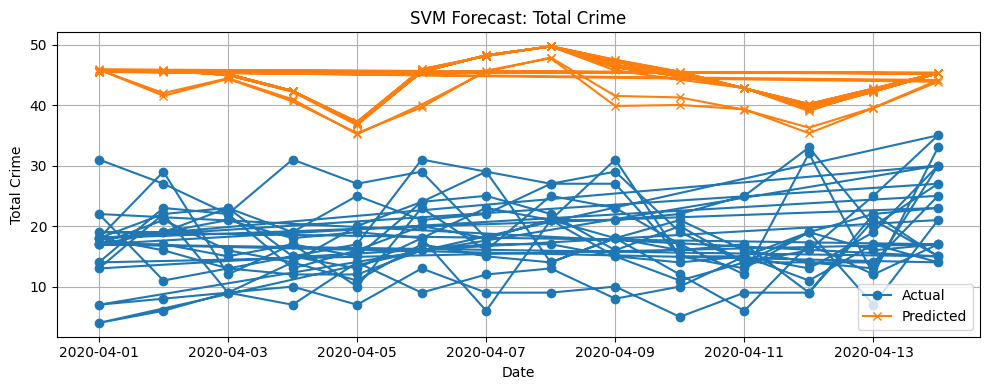

In [14]:
# Plot Predictions vs Actual
plt.figure(figsize=(10, 4))
plt.plot(test_df["Date"], y_test.values, label="Actual", marker='o')
plt.plot(test_df["Date"], test_pred, label="Predicted", marker='x')
plt.title("SVM Forecast: Total Crime")
plt.xlabel("Date")
plt.ylabel("Total Crime")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Add prediction and actuals back into test_df
test_df = test_df.copy()
test_df["Actual"] = y_test.values
test_df["Predicted"] = test_pred

In [16]:
# List of boroughs
boroughs = test_df["Borough"].unique()

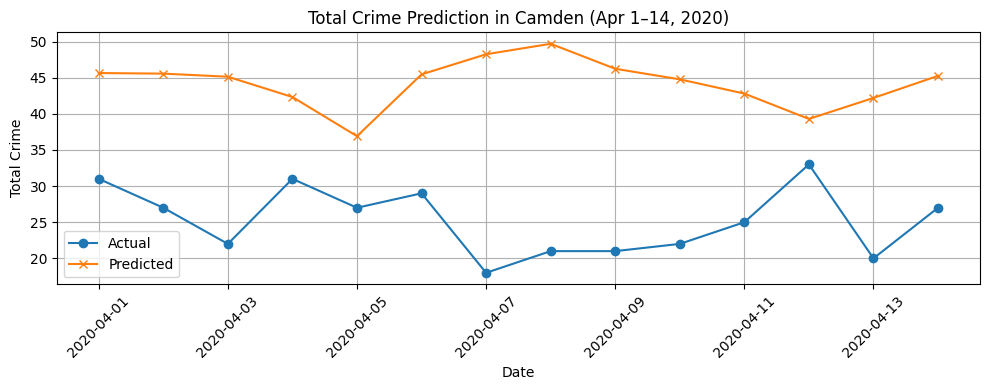

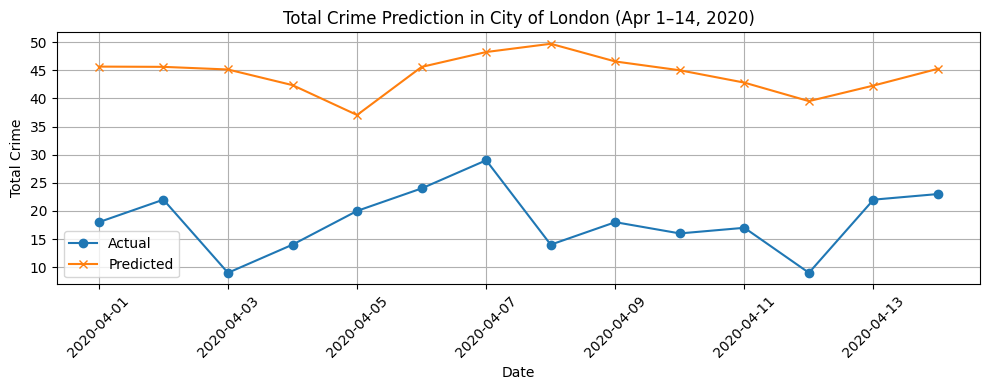

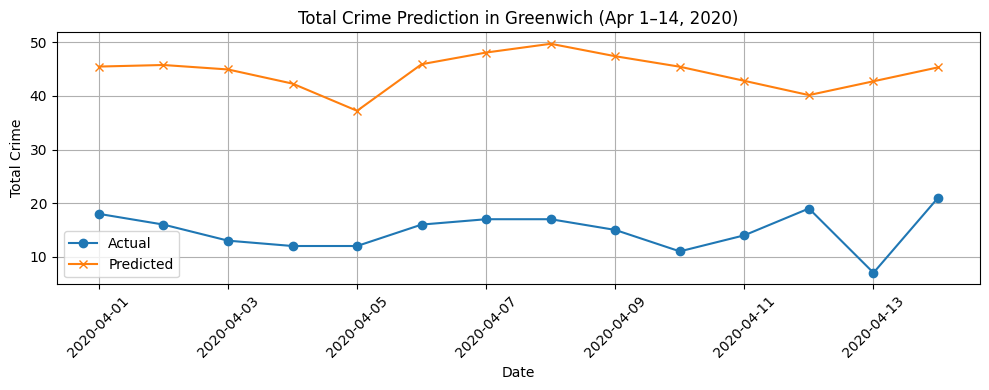

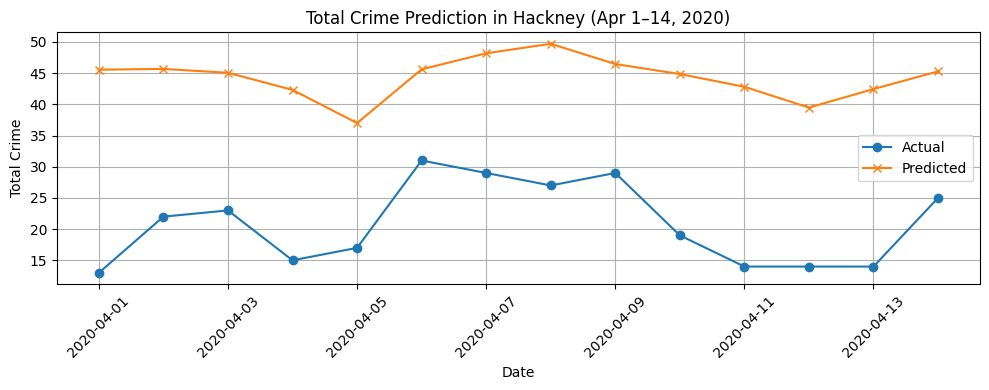

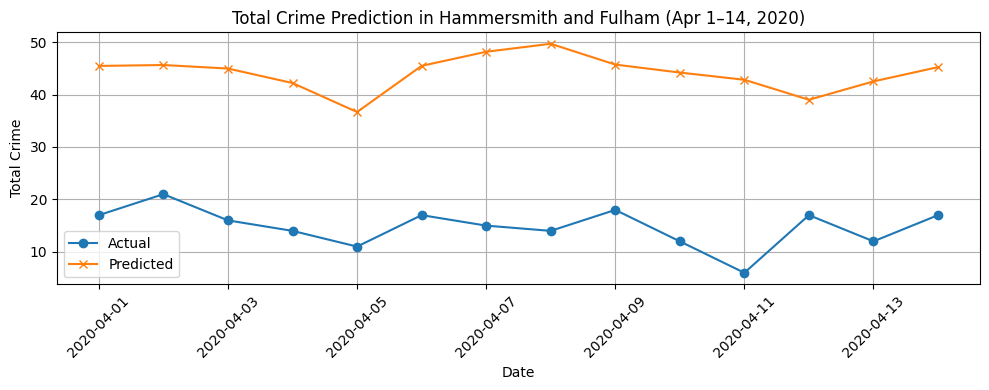

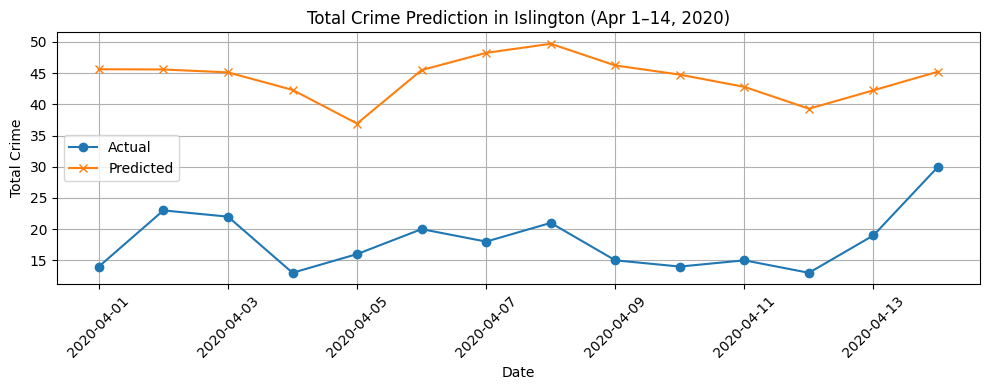

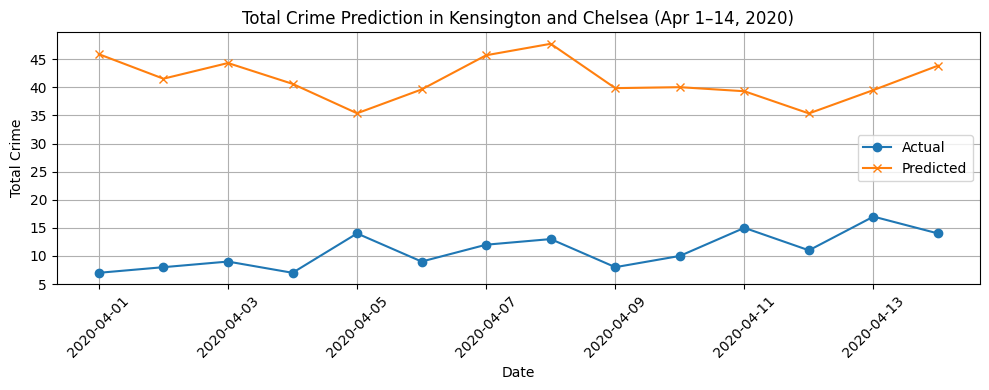

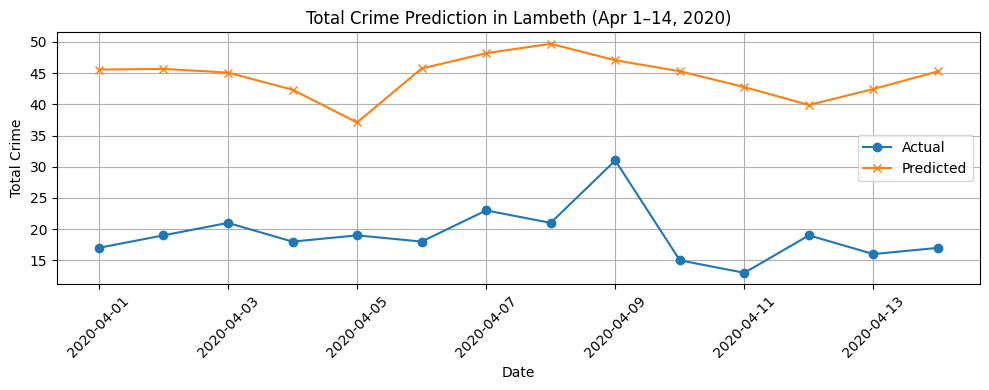

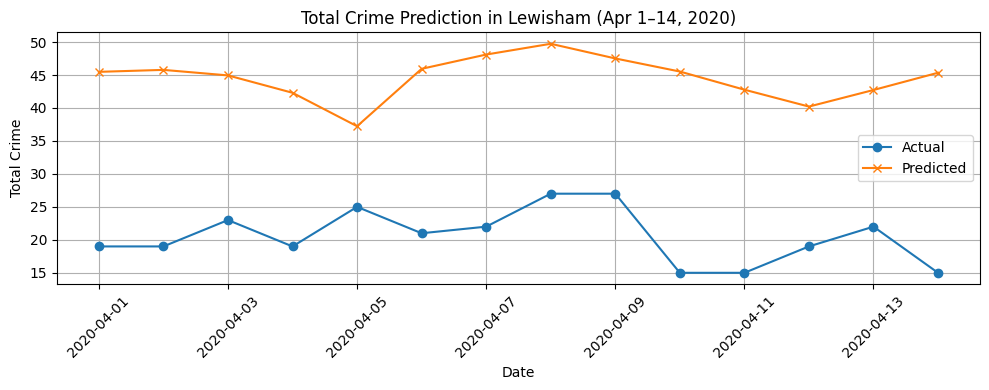

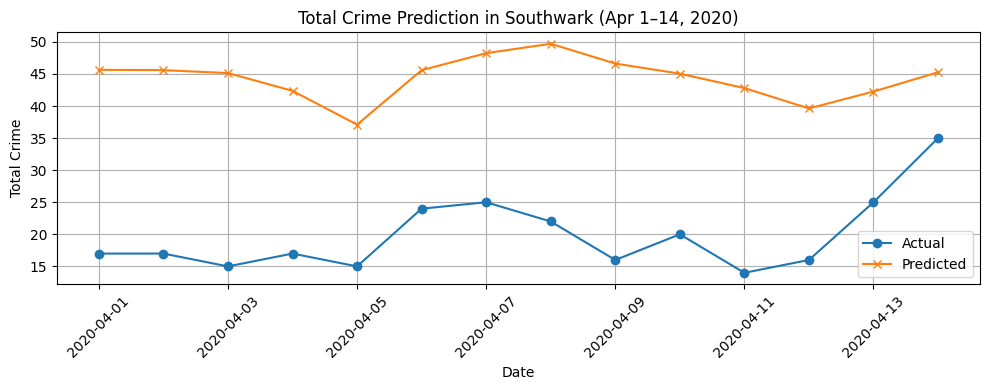

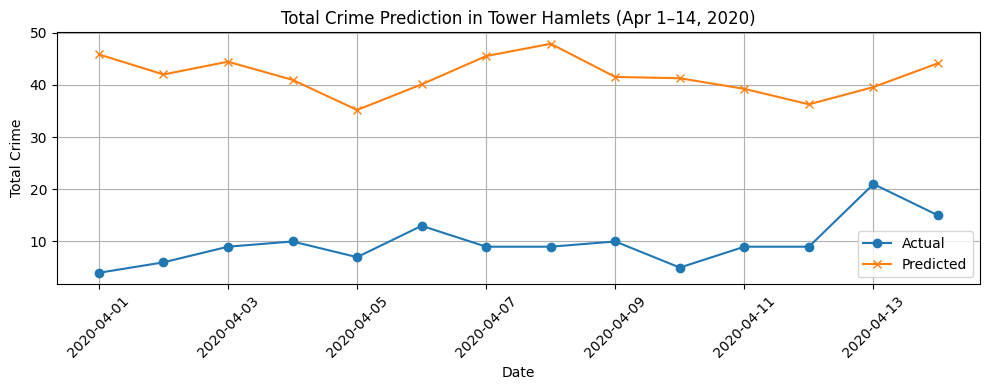

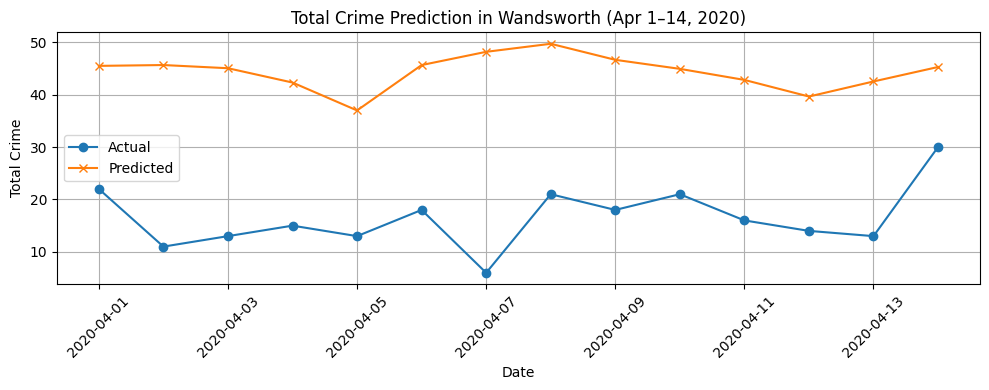

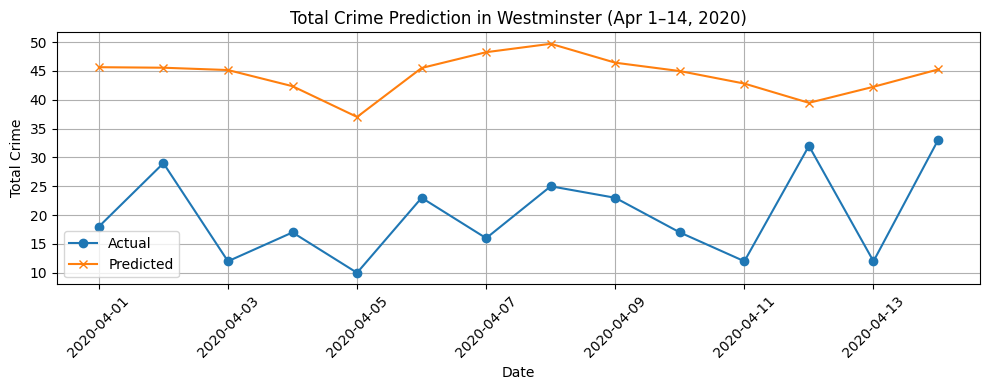

In [17]:
# Plot for each borough
for borough in boroughs:
    df_b = test_df[test_df["Borough"] == borough]
    
    plt.figure(figsize=(10, 4))
    plt.plot(df_b["Date"], df_b["Actual"], label="Actual", marker='o')
    plt.plot(df_b["Date"], df_b["Predicted"], label="Predicted", marker='x')
    plt.title(f"Total Crime Prediction in {borough} (Apr 1–14, 2020)")
    plt.xlabel("Date")
    plt.ylabel("Total Crime")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [18]:
# Check how similar predictions are across boroughs
pivot = test_df.pivot(index="Date", columns="Borough", values="Predicted")
pivot.corr()

Borough,Camden,City of London,Greenwich,Hackney,Hammersmith and Fulham,Islington,Kensington and Chelsea,Lambeth,Lewisham,Southwark,Tower Hamlets,Wandsworth,Westminster
Borough,,,,,,,,,,,,,
Camden,1.000000,0.999528,0.992314,0.999499,0.997642,0.999980,0.859746,0.996496,0.991060,0.999247,0.902380,0.998757,0.999766
City of London,0.999528,1.000000,0.995467,0.999718,0.995765,0.999521,0.847073,0.998549,0.994537,0.999952,0.893477,0.999546,0.999922
Greenwich,0.992314,0.995467,1.000000,0.995242,0.986219,0.992491,0.800961,0.999014,0.999936,0.995994,0.857869,0.996938,0.994386
Hackney,0.999499,0.999718,0.995242,1.000000,0.997215,0.999605,0.846757,0.998068,0.994178,0.999525,0.891899,0.999773,0.999637
Hammersmith and Fulham,0.997642,0.995765,0.986219,0.997215,1.000000,0.997893,0.867434,0.990811,0.984356,0.994944,0.903207,0.995847,0.996248
Islington,0.999980,0.999521,0.992491,0.999605,0.997893,1.000000,0.858449,0.996538,0.991225,0.999221,0.900903,0.998884,0.999734
Kensington and Chelsea,0.859746,0.847073,0.800961,0.846757,0.867434,0.858449,1.000000,0.822674,0.796423,0.844588,0.989369,0.838068,0.852334
Lambeth,0.996496,0.998549,0.999014,0.998068,0.990811,0.996538,0.822674,1.000000,0.998632,0.998890,0.875729,0.998981,0.997931
Lewisham,0.991060,0.994537,0.999936,0.994178,0.984356,0.991225,0.796423,0.998632,1.000000,0.995159,0.854734,0.996066,0.993359


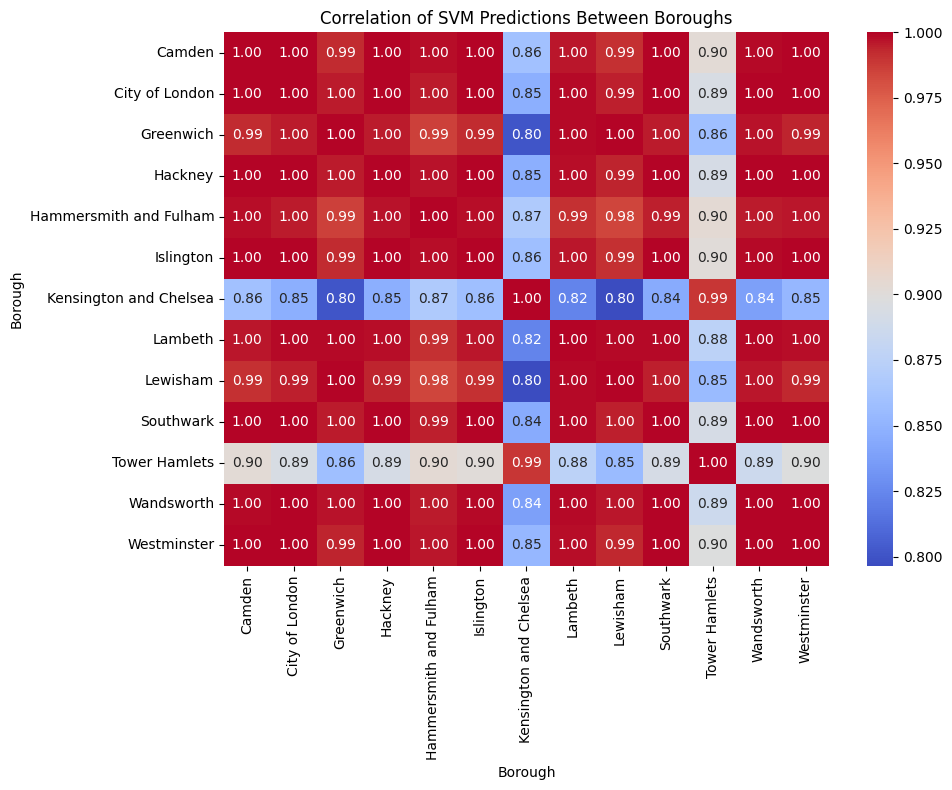

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of SVM Predictions Between Boroughs")
plt.tight_layout()
plt.show()